In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/maulanaakbardj/Home-Agriculture-Monitoring-System

Cloning into 'Home-Agriculture-Monitoring-System'...
remote: Enumerating objects: 55487, done.
remote: Total 55487 (delta 0), reused 0 (delta 0), pack-reused 55487
Receiving objects: 100% (55487/55487), 871.17 MiB | 38.45 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (42103/42103), done.


In [3]:
import os

In [4]:
mypath= '/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Bercak Kering Alternaria    1000
Hawar Daun                  1000
Sehat                        152
dtype: int64

In [8]:
df.head()

,path,file_name,tag
0,/content/Home-Agriculture-Monitoring-System/ML...,c59f2dde-4805-4f63-b47a-79fe9cd9364b___RS_Earl...,Bercak Kering Alternaria
1,/content/Home-Agriculture-Monitoring-System/ML...,c18f83e1-2144-440f-9603-74fe58c66073___RS_Earl...,Bercak Kering Alternaria
2,/content/Home-Agriculture-Monitoring-System/ML...,cb615e16-034f-465a-89a6-91e091698723___RS_Earl...,Bercak Kering Alternaria
3,/content/Home-Agriculture-Monitoring-System/ML...,b7712e86-f508-4485-8a42-5dd447f3b510___RS_Earl...,Bercak Kering Alternaria
4,/content/Home-Agriculture-Monitoring-System/ML...,6799ab86-73ef-4825-b4cf-9ae616c40ce9___RS_Earl...,Bercak Kering Alternaria


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 1721
val size 215
test size 216


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)



set         tag                     
test        Bercak Kering Alternaria    112
            Hawar Daun                   92
            Sehat                        11
train       Bercak Kering Alternaria    778
            Hawar Daun                  819
            Sehat                       124
validation  Bercak Kering Alternaria    110
            Hawar Daun                   89
            Sehat                        17
dtype: int64 




,path,tag,set
215,/content/Home-Agriculture-Monitoring-System/ML...,Bercak Kering Alternaria,train
934,/content/Home-Agriculture-Monitoring-System/ML...,Hawar Daun,train
134,/content/Home-Agriculture-Monitoring-System/ML...,Hawar Daun,train


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/"
dataset_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
EPOCH = 10

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [23]:
train_generator = train_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/dataset/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/dataset/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/dataset/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 1721 images belonging to 3 classes.
Found 216 images belonging to 3 classes.
Found 215 images belonging to 3 classes.


In [24]:
print(labels)

dict_keys(['Bercak Kering Alternaria', 'Hawar Daun', 'Sehat'])


In [25]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator


In [26]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [27]:
from tensorflow.keras.applications import Xception
# get base models
base_model = Xception(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)


83689472/83683744 [==============================] - 0s 0us/step


In [28]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
# summarize the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [30]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


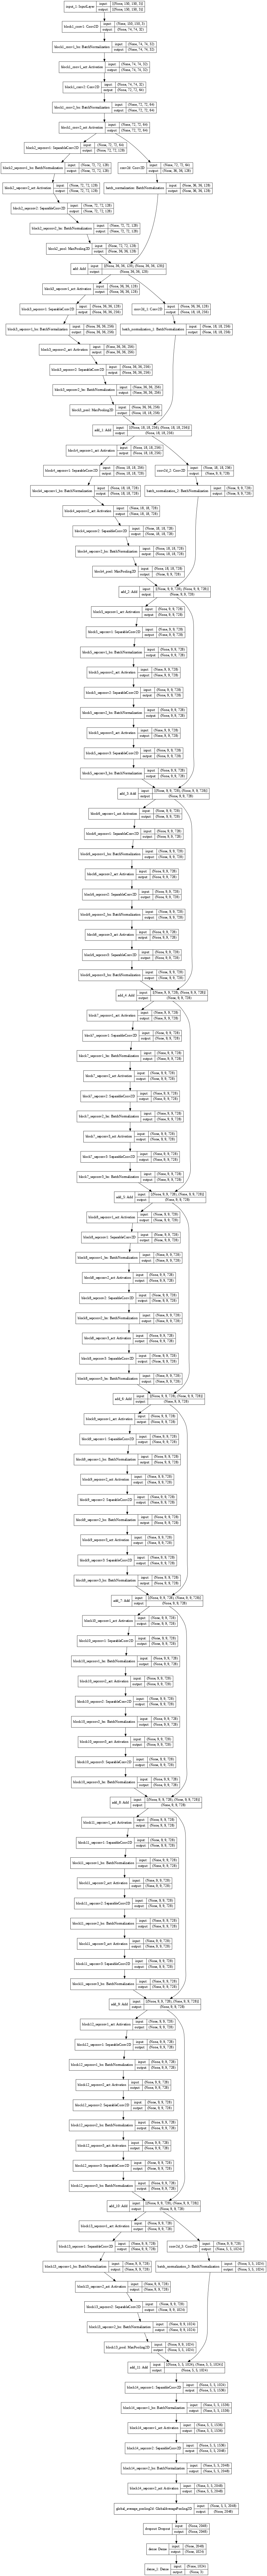

In [31]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [32]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/10
108/108 [==============================] - 63s 244ms/step - loss: 0.3085 - accuracy: 0.9030 - val_loss: 2.1645 - val_accuracy: 0.8889
Epoch 2/10
108/108 [==============================] - 24s 221ms/step - loss: 0.1422 - accuracy: 0.9605 - val_loss: 1.5673 - val_accuracy: 0.9028
Epoch 3/10
108/108 [==============================] - 24s 221ms/step - loss: 0.0926 - accuracy: 0.9762 - val_loss: 0.0388 - val_accuracy: 0.9907
Epoch 4/10
108/108 [==============================] - 24s 223ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 5/10
108/108 [==============================] - 24s 222ms/step - loss: 0.0527 - accuracy: 0.9866 - val_loss: 0.0678 - val_accuracy: 0.9676
Epoch 6/10
108/108 [==============================] - 24s 222ms/step - loss: 0.0511 - accuracy: 0.9866 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 7/10
108/108 [==============================] - 24s 225ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.1141 - val_ac

In [33]:
history.history['loss']

[0.3084733188152313,
 0.14218555390834808,
 0.09258904308080673,
 0.04141023010015488,
 0.05271592363715172,
 0.05106132850050926,
 0.027183987200260162,
 0.026075871661305428,
 0.05473199114203453,
 0.030123163014650345]

In [34]:
history.history['accuracy']

[0.902963399887085,
 0.9604880809783936,
 0.9761766195297241,
 0.9872167110443115,
 0.986635684967041,
 0.986635684967041,
 0.9907031059265137,
 0.9907031059265137,
 0.9895409941673279,
 0.9936083555221558]

In [35]:
from matplotlib import pyplot as plt

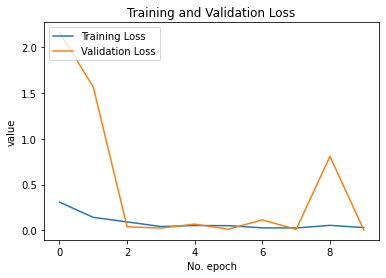

In [36]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

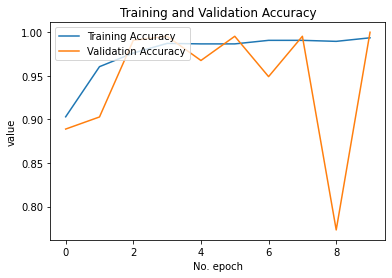

In [37]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 1.0000 
Loss on training data: 0.0014 

Accuracy on test data: 1.0000 
Loss on test data: 0.0022 



In [39]:
MODEL_BASE_PATH = "/content/drive/MyDrive/"
PROJECT_NAME = "model_project"
SAVE_MODEL_NAME = "Model_Kentang_Xception.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_project/Model_Kentang_Xception.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [40]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [42]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Bercak Kering Alternaria', 'Hawar Daun', 'Sehat']

In [43]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [45]:
from tensorflow.keras.models import load_model

In [46]:
MODEL_PATH = '/content/drive/MyDrive/model_project/Model_Kentang_Xception.h5'
model = load_model(MODEL_PATH,compile=False)

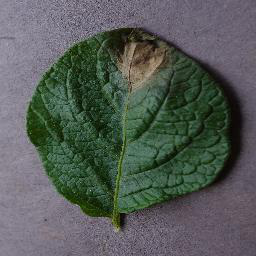

In [47]:
# read image
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Kentang/Hawar Daun/17ed933e-629f-4db2-b4f3-865f69d43589___RS_LB 2599.JPG')
display(im)

In [48]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Hawar Daun 99.99839067459106 %
